In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import signal
import seaborn as sb

## Sum of standard Gaussian random variables

In [25]:
#given two independent gaussian variables X,Y; calculate Z = X + Y ~ PDF(Z) 

In [26]:
delta = 1e-4
big_grid = np.arange(-10,10,delta)

In [27]:
mean = 0  #E(X)=E(Y)=0
var = 1   #Var(X)=Var(Y)=1
std = 1   

In [28]:
X = norm(loc=mean, scale=std)  # Normal distribution mean = 0, std = 1
Y = norm(loc=mean, scale=std)  # Normal distribution mean = 0, std = 1

In [29]:
pmf1 = X.pdf(big_grid)*delta
print("Sum of gaussian pmf1: "+str(sum(pmf1)))

Sum of gaussian pmf1: 1.000000000002199


In [30]:
pmf2 = Y.pdf(big_grid)*delta
print("Sum of gaussian pmf2: "+str(sum(pmf1)))

Sum of gaussian pmf2: 1.000000000002199


In [31]:
conv_pmf = signal.fftconvolve(pmf1,pmf2,'same')  #convolution of pmf1 and pmf2
print("Sum of convoluted pmf: "+str(sum(conv_pmf)))

Sum of convoluted pmf: 1.0000000000031315


In [32]:
def realcdf(x):
    return norm(loc = 2*mean, scale = np.sqrt(2*var)).cdf(x)

In [33]:
print("Supposed to be: " + str(realcdf(max(big_grid)) - realcdf(min(big_grid))))

Supposed to be: 0.9999999999984621


In [34]:
pdf1 = pmf1/delta
pdf2 = pmf2/delta
conv_pdf = conv_pmf/delta
print("Integration of convoluted pdf: " + str(np.trapz(conv_pdf, big_grid)))

Integration of convoluted pdf: 1.0000000000007927


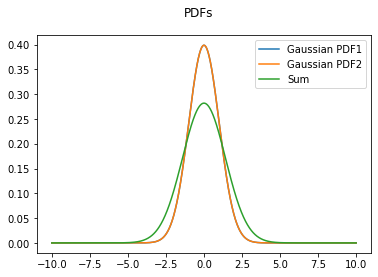

In [35]:
plt.plot(big_grid, pdf1, label='Gaussian PDF1')
plt.plot(big_grid, pdf2, label='Gaussian PDF2')
plt.plot(big_grid, conv_pdf, label='Sum')
plt.legend(loc='best'), plt.suptitle('PDFs')
plt.show() 

## Mean and variance of convoluted PDF

In [36]:
#E(Z)=E(X)+E(Y); Var(Z)=Var(X)+Var(Y); if E(X)=E(Y)=0 and Var(X)=Var(Y)=1 it follows E(Z)=0 and Var(Z)=2

In [37]:
#mean
E_Z = (big_grid * conv_pmf).sum(); E_Z  #E(Z) = Σ z . P(z): sum(z[j] * p(z[j]));  expected: E(Z)=0

0.00010000002329397552

In [38]:
E_Z_squared = (big_grid**2 * conv_pmf).sum(); E_Z_squared  #E(Z²) = Σ z² . P(z): sum(z[j]² * p(z[j]))

2.000000009849539

In [39]:
#variance
Var_Z =  E_Z_squared - (E_Z)**2; Var_Z  #Var(Z) = E(Z²) - E(Z)²;  expected: Var(Z)=2

1.9999999998495344

## Reference implementation

In [40]:
import openturns as ot

In [41]:
mean = 0  #E(X)=E(Y)=0
std = 1   #Var(X)=Var(Y)=1

In [42]:
X = ot.Normal(mean, std)  # Normal distribution mean = 0, std = 1
Y = ot.Normal(mean, std)  # Normal distribution mean = 0, std = 1

In [43]:
Z = X + Y  #sum of two gaussian random variables

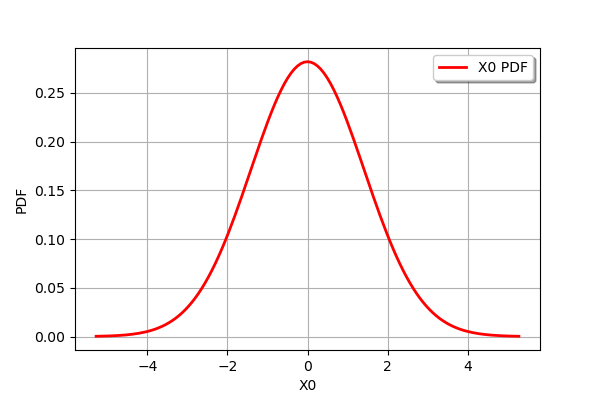

In [44]:
Z.drawPDF()

In [45]:
Z.getMean()  #E(Z)=E(X)+E(Y)=0

class=Point name=Unnamed dimension=1 values=[0]

In [46]:
Z.getCovariance()  #Var(Z)=Var(X)+Var(Y)=2

class=CovarianceMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[2]